In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import os

to access the files inside a folder


In [2]:
for dirnames, dirs, filenames in os.walk('S:\data_science\house-prices-advanced-regression-techniques'):
    for filenames in filenames:
        print(os.path.join(dirnames, filenames))


S:\data_science\house-prices-advanced-regression-techniques\data_description.txt
S:\data_science\house-prices-advanced-regression-techniques\sample_submission.csv
S:\data_science\house-prices-advanced-regression-techniques\test.csv
S:\data_science\house-prices-advanced-regression-techniques\Top_features_vs_salesPrice.jpg
S:\data_science\house-prices-advanced-regression-techniques\Top_features_vs_salesPrice_without_outliers.jpg
S:\data_science\house-prices-advanced-regression-techniques\train.csv


In [113]:
for dirname, _, filenames in os.walk('S:\data_science\house-prices-advanced-regression-techniques'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

S:\data_science\house-prices-advanced-regression-techniques\data_description.txt
S:\data_science\house-prices-advanced-regression-techniques\sample_submission.csv
S:\data_science\house-prices-advanced-regression-techniques\test.csv
S:\data_science\house-prices-advanced-regression-techniques\Top_features_vs_salesPrice.jpg
S:\data_science\house-prices-advanced-regression-techniques\Top_features_vs_salesPrice_without_outliers.jpg
S:\data_science\house-prices-advanced-regression-techniques\train.csv


In [114]:
train= pd.read_csv('S:\data_science\house-prices-advanced-regression-techniques/train.csv')
test= pd.read_csv('S:\data_science\house-prices-advanced-regression-techniques/test.csv')

In [115]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
train.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [117]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


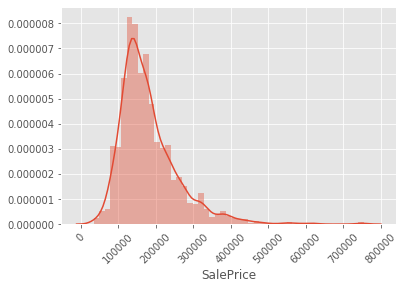

In [118]:
import seaborn as sns
sns.distplot(train['SalePrice'])
plt.xticks(rotation=45);

In [119]:
print('Skewness = ', train['LotArea'].skew())

Skewness =  12.207687851233496


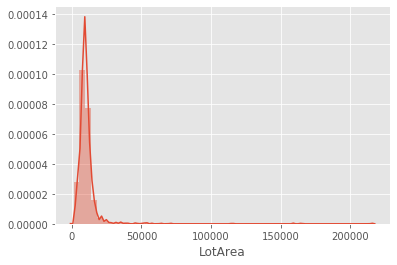

In [120]:
sns.distplot(train['LotArea'])

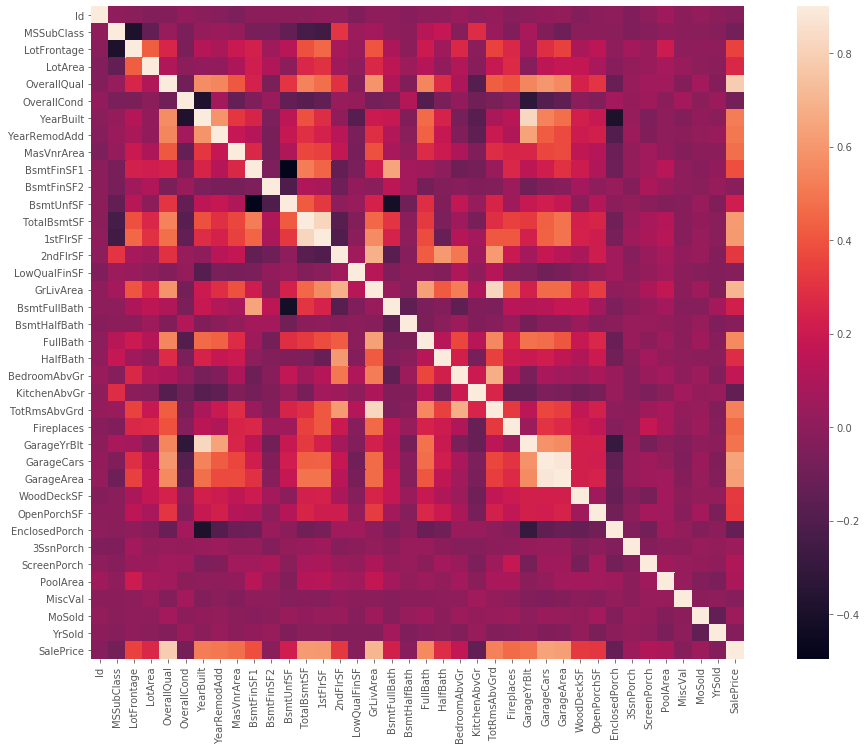

In [121]:
corr=train.corr()
plt.figure(figsize=(19,12))
sns.heatmap(corr, vmax=0.9, square= True)
plt.show();

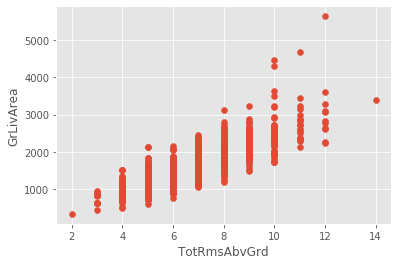

In [122]:
plt.scatter(x=train['TotRmsAbvGrd'], y=train['GrLivArea'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')
plt.show();

In [123]:
train.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

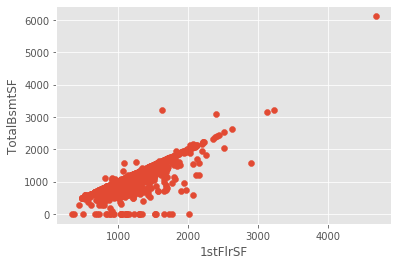

In [69]:
plt.scatter(x=train['1stFlrSF'], y=train['TotalBsmtSF'])
plt.xlabel('1stFlrSF')
plt.ylabel('TotalBsmtSF')
plt.show();

In [125]:
corr=train.corr()
corr_top= corr['SalePrice'].sort_values(ascending= False)[:10]
top_features= corr_top.index[1:]
print(corr_top)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [91]:
corr_top.index[0]

'SalePrice'

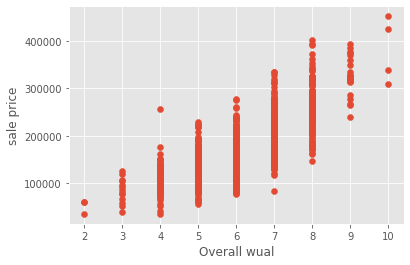

In [92]:
plt.scatter(x=train['OverallQual'], y=train['SalePrice'])
plt.xlabel('Overall wual')
plt.ylabel('sale price')
plt.show();

In [124]:
corr_top2= corr['SalePrice'].sort_values(ascending= True)[:10]
top_features2= corr_top2.index[1:]
print(corr_top2)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64


In [94]:
numeric_cols = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt']
nominal_cols = ['OverallQual','GarageCars','FullBath','TotRmsAbvGrd']

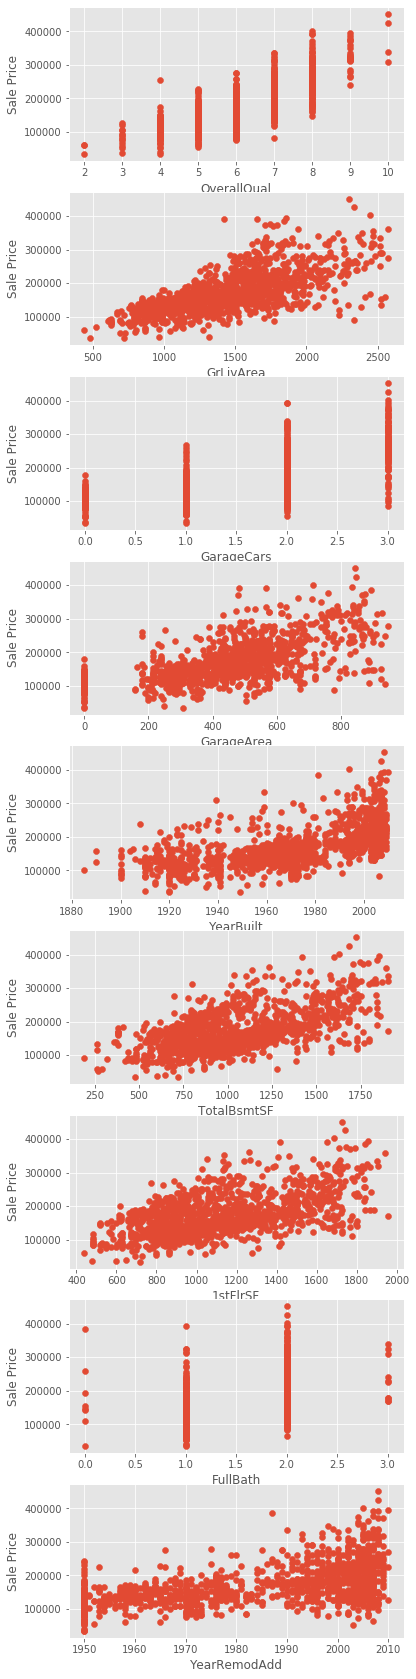

In [95]:
fig, ax= plt.subplots(nrows= 9, ncols= 1, figsize=(6, 30))
for i in range(len(top_features)):
    ax[i].scatter(x= train[top_features[i]],y= train['SalePrice'])
    ax[i].set_xlabel('%s'%(top_features[i]))
    ax[i].set_ylabel('Sale Price')


In [77]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCFAED0F88>,
      dtype=object)

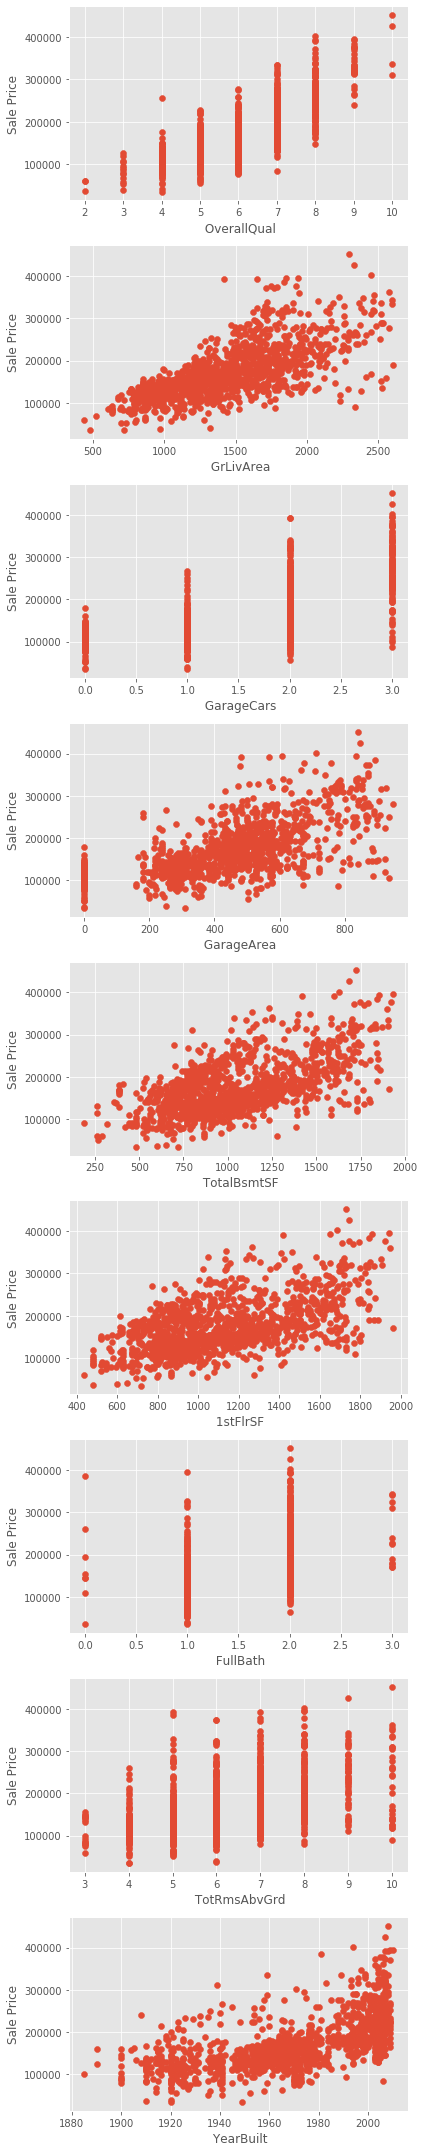

In [88]:
fig, ax= plt.subplots(nrows= 9, ncols= 1, figsize=(6, 30))
for i in range(len(top_features)):
    ax[i].scatter(x= train[top_features[i]],y= train['SalePrice'])
    ax[i].set_xlabel(' %s' %(top_features[i]))
    ax[i].set_ylabel('Sale Price')
plt.tight_layout()
plt.savefig('S:\data_science\house-prices-advanced-regression-techniques\Top_features_vs_salesPrice.jpg', dpi= 300, bbox_inches='tight')
plt.show();

In [126]:
Q1=[]
Q3=[]
Lower_bound=[]
Upper_bound=[]
Outliers=[]

for i in top_features:
    q1, q3= np.percentile(train[i],25), np.percentile(train[i],75)
    iqr = q3-q1
    cut_off = 1.5*iqr
    lower_bound = q1 - cut_off
    upper_bound = q3 + cut_off
    outlier= [x for x in train.index if train.loc[x,i]<lower_bound or train.loc[x, i]>upper_bound]
    Q1.append(q1)
    Q3.append(q3)
    Lower_bound.append(lower_bound)
    Upper_bound.append(upper_bound)
    Outliers.append(len(outlier))
    try:
        train.drop(outlier, inplace= True, axis=0)
    except:
        continue
df_out= pd.DataFrame({'Column': top_features, 'Q1': Q1, 'Q3': Q3, 'Lowe bound':Lower_bound, 'Upper_bound': Upper_bound, 'No. of Outliers': Outliers})
df_out.sort_values(by='No. of Outliers', ascending = False)
    

,Column,Q1,Q3,Lowe bound,Upper_bound,No. of Outliers
4,TotalBsmtSF,792.75,1266.25,82.500,1976.500,58
1,GrLivArea,1131.00,1778.25,160.125,2749.125,31
3,GarageArea,325.25,576.00,-50.875,952.125,14
7,TotRmsAbvGrd,5.00,7.00,2.000,10.000,11
5,1stFlrSF,866.00,1343.50,149.750,2059.750,7
2,GarageCars,1.00,2.00,-0.500,3.500,5
8,YearBuilt,1954.00,2000.00,1885.000,2069.000,5
0,OverallQual,5.00,7.00,2.000,10.000,2
6,FullBath,1.00,2.00,-0.500,3.500,0


In [83]:
len(train)
q3

2000.0

In [84]:
outlier

[]

In [85]:
Outliers


[0, 13, 0, 0, 4, 1, 0, 0, 0]

In [97]:
train.shape


(1304, 81)

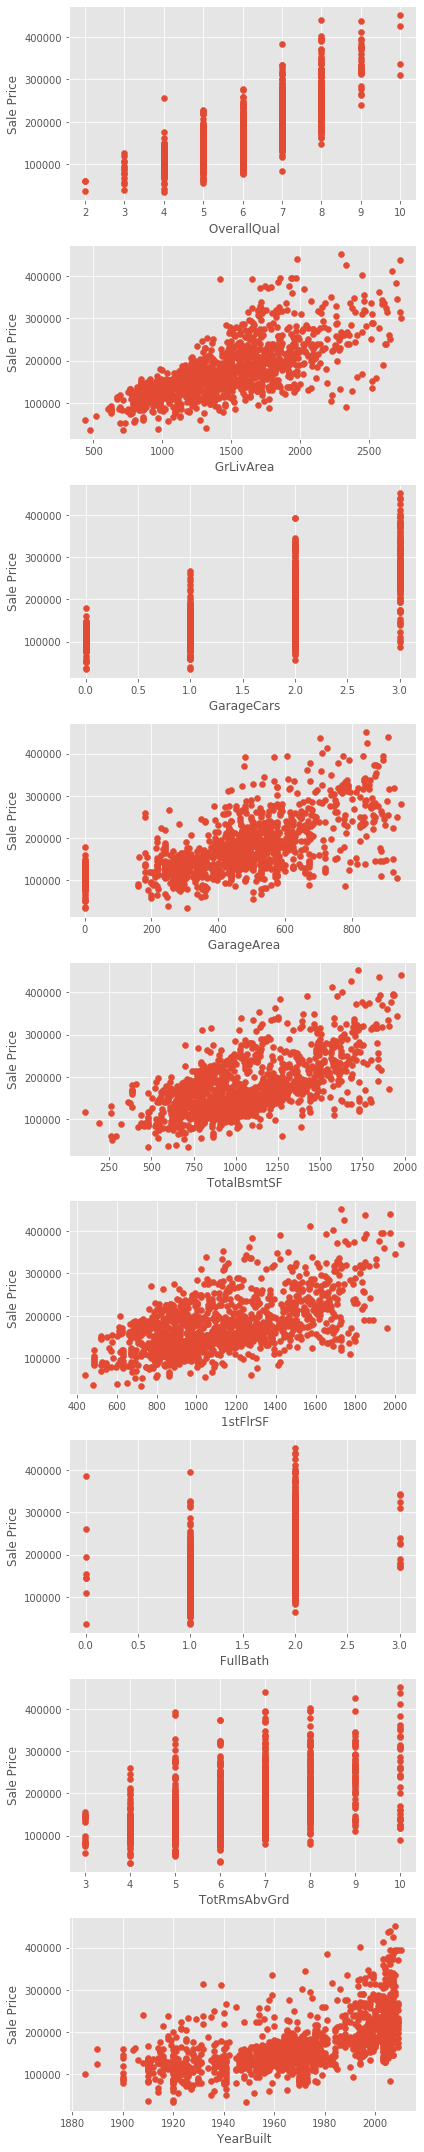

In [42]:
fig, ax= plt.subplots(nrows= 9, ncols= 1, figsize=(6, 30))
for i in range(len(top_features)):
    ax[i].scatter(x= train[top_features[i]],y= train['SalePrice'])
    ax[i].set_xlabel(' %s' %(top_features[i]))
    ax[i].set_ylabel('Sale Price')
plt.tight_layout()
plt.savefig('S:\data_science\house-prices-advanced-regression-techniques\Top_features_vs_salesPrice_without_outliers.jpg', dpi= 300, bbox_inches='tight')
plt.show();

In [53]:
plt.savefig('S:\data_science\house-prices-advanced-regression-techniques\Top_features_vs_salesPrice.jpg', dpi= 300, bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

In [127]:
#train rows
ntrain = train.shape[0]

#save log transform of target feature
target = np.log(train['SalePrice'])

#drop Id and SalePrice from train dataframe
train.drop(['Id','SalePrice'],inplace=True,axis=1)

#store test Id
test_id = test['Id']
#drop test Id
test.drop(['Id'],inplace=True,axis=1)

#concatenate train and test dataframes
train = pd.concat([train,test])

In [128]:
ntrain

1327

In [129]:
test.shape

(1459, 79)

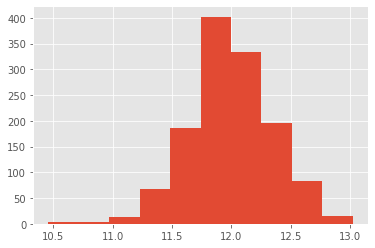

In [100]:
target.hist()

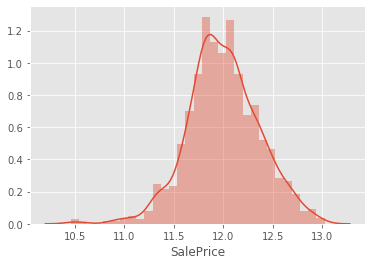

In [83]:
sns.distplot(target)

In [102]:
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          2757
MiscFeature     2665
Alley           2572
Fence           2214
FireplaceQu     1372
LotFrontage      463
GarageCond       147
GarageQual       147
GarageYrBlt      147
GarageFinish     147
GarageType       145
BsmtCond          45
BsmtExposure      45
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        22
MasVnrArea        21
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [95]:
train['PoolQC'].unique()

array([nan, 'Fa', 'Gd', 'Ex'], dtype=object)

In [96]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr'], dtype=object)

In [102]:
train['Alley'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 1962., 2006., 1960., 1991., 1970., 1958., 2005.,
       1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966., 1959.,
       1995., 1954., 1953., 1983., 1977.,   nan, 1997., 1985., 1963.,
       1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989., 1915.,
       1956., 1948., 1974., 2009., 1961., 1921., 1900., 1951., 1969.,
       1979., 1967., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1986., 1988., 1916., 1932., 1972., 1980., 1924., 1996., 1940.,
       1949., 1994., 1910., 1978., 1982., 1992., 1950., 1925., 1941.,
       2010., 1927., 1918., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1906., 1914., 1946., 1934., 1908., 1929., 1933., 1917.,
       1896., 1895., 2207., 1943., 1919.])

In [226]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [130]:
#NA means no Pool
train['PoolQC'].replace(['Ex','Gd','TA','Fa',np.nan],[4,3,2,1,0],inplace=True)

# NA means no fence
train['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw',np.nan],[4,3,2,1,0],inplace=True)

# NA means no fireplace
train['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)

#                                                 Nominal features
# NA means no miscellaneous feature
train['MiscFeature'].fillna('None',inplace=True)

# NA means no alley access
train['Alley'].fillna('None',inplace=True)

#                                               Numerical features
# Replace null lotfrontage with average of the neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [131]:
#                                                Ordinal features
#NA means no Pool
#train['PoolQC'].replace(['Ex','Gd','TA','Fa',np.nan],[4,3,2,1,0],inplace=True)

# NA means no fence
train['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw',np.nan],[4,3,2,1,0],inplace=True)

# NA means no fireplace
train['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)

#                                                 Nominal features
# NA means no miscellaneous feature
train['MiscFeature'].fillna('None',inplace=True)

# NA means no alley access
train['Alley'].fillna('None',inplace=True)

#                                               Numerical features
# Replace null lotfrontage with average of the neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [132]:
train['PoolQC'].unique()

array([0, 1, 3, 4], dtype=int64)

In [133]:
train['MiscFeature'].fillna('None', inplace= True)
train['Alley'].fillna('None', inplace= True)

In [134]:
train['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr'], dtype=object)

In [135]:
train['LotFrontage']= train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [136]:
for i in ['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    train[i].fillna(0,inplace=True)
    train['MasVnrType'].fillna('None',inplace=True)

#If no masonary work, then area is 0
train['MasVnrArea'].fillna(0,inplace=True)

#Replace with the most common value
for i in ['MSZoning','Utilities']:
    train[i].fillna(train[i].mode()[0],inplace=True)

#"Assume typical unless deductions are warranted"
train['Functional'].fillna('Typ',inplace=True)

#Replace with others
train['SaleType'].fillna('Oth',inplace=True)
#Replace with most common value
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

#Replace with 'Other' value
for i in ['Exterior1st','Exterior2nd']:
    train[i].fillna('Other',inplace=True)
    
#Replace with most common value
train['KitchenQual'].fillna(train['KitchenQual'].mode()[0],inplace=True)
#ordinal value
#train['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace=True)


In [137]:
train['KitchenQual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [138]:
#                                                Ordinal features
train['CentralAir'].replace(['N','Y'],[0,1],inplace=True)
#                                                 Nominal features
for i in ['HeatingQC','ExterCond','ExterQual']:
    train[i].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace=True)

In [139]:
train['TotalSF']= train.apply(lambda x: x['1stFlrSF']+x['2ndFlrSF']+x['TotalBsmtSF'], axis= 1)
train['TotalBath']= train.apply(lambda x: x['FullBath']+x['HalfBath']+x['BsmtFullBath']+ 0.5*x['BsmtHalfBath'], axis= 1)
train['TotalPorch']= train.apply(lambda x: x['OpenPorchSF']+x['EnclosedPorch']+x['3SsnPorch']+x['ScreenPorch'], axis= 1)

train['NewHouse'] = train.apply(lambda x: 1 if x['SaleCondition']=='Partial' else 0, axis=1)


In [140]:
train=pd.get_dummies(train, drop_first= True)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,3,2,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,3,2,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,3,2,...,0,0,0,0,1,0,0,0,1,0


In [147]:
df= train.iloc[:ntrain, :]
test= train.iloc[ntrain:,:]
print(df.head())
print(test.head())

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_ConLI  \
0          2003       196.0          3          2  ...               0   
1          1976         0.0          2          2  ...               0   
2          2002       162.0          3          2  ...               0   
3          1970         0.0          2          2  ...               0   
4          2000       350.0          3          2  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0     

In [143]:
from sklearn.model_selection import train_test_split
x= df
y= target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=27)

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x, y)
feat_importances= pd.Series(model.feature_importances_, index= x.columns)
feat_importances.nlargest(5).plot(kind= 'barh')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [183]:
X=x[:1327]

In [185]:
X.shape

(2786, 221)

In [197]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 1458
Columns: 221 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(15), int64(39), uint8(167)
memory usage: 1.6 MB
